In [1]:
'''#Establized connection with python and sql
import pandas as pd
import os
import psycopg2

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')
    # Added payments.csv for specific handling
]

# Connect to the MySQL database
# conn = mysql.connect(
#     host='postgress17',
#     user='root',
#     password='1234',
#     database='ecommerce'
# )


connection = psycopg2.connect(database="ecommerce", user="postgres", password="admin123", host="localhost", port=5432)

cursor = connection.cursor()
# cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/intel/Desktop/sql project files/Retail_sales analysis'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'{col} {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS {table_name} ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO {table_name} ({', '.join(['' + col + '' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    connection.commit()

# Close the connection
connection.close()'''


'#Establized connection with python and sql\nimport pandas as pd\nimport os\nimport psycopg2\n\n# List of CSV files and their corresponding table names\ncsv_files = [\n    (\'customers.csv\', \'customers\'),\n    (\'orders.csv\', \'orders\'),\n    (\'sellers.csv\', \'sellers\'),\n    (\'products.csv\', \'products\'),\n    (\'geolocation.csv\', \'geolocation\'),\n    (\'payments.csv\', \'payments\'),\n    (\'order_items.csv\',\'order_items\')\n    # Added payments.csv for specific handling\n]\n\n# Connect to the MySQL database\n# conn = mysql.connect(\n#     host=\'postgress17\',\n#     user=\'root\',\n#     password=\'1234\',\n#     database=\'ecommerce\'\n# )\n\n\nconnection = psycopg2.connect(database="ecommerce", user="postgres", password="admin123", host="localhost", port=5432)\n\ncursor = connection.cursor()\n# cursor = conn.cursor()\n\n# Folder containing the CSV files\nfolder_path = \'C:/Users/intel/Desktop/sql project files/Retail_sales analysis\'\n\ndef get_sql_type(dtype):\n 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2  

cns= psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()




# 1. List all unique cities where customers are located.

In [3]:
querry='''Select distinct(customer_city) from customers '''
cur.execute(querry)
data=cur.fetchall()
data

[('bom jardim de minas',),
 ('alto rio doce',),
 ('alvorada do gurgueia',),
 ('batatais',),
 ('capao da porteira',),
 ('icatu',),
 ('osorio',),
 ('populina',),
 ('novo mundo',),
 ('tururu',),
 ("alta floresta d'oeste",),
 ('cajamar',),
 ('presidente lucena',),
 ('santa maria do salto',),
 ('cacador',),
 ('araxa',),
 ('carnaubais',),
 ('lindolfo collor',),
 ('japira',),
 ('botelho',),
 ('tabapua',),
 ('joao camara',),
 ('barrolandia',),
 ('nepomuceno',),
 ('ibertioga',),
 ('frei lagonegro',),
 ('sao jose da barra',),
 ('pitangui',),
 ('jaragua do sul',),
 ('ervalia',),
 ('governador celso ramos',),
 ('santa ernestina',),
 ('quatro bocas',),
 ('grao mogol',),
 ('diamantina',),
 ('itaju',),
 ('tiradentes',),
 ('junqueiro',),
 ('macambira',),
 ('barauna',),
 ('ibirapua',),
 ('uniao do sul',),
 ('palma',),
 ('agrolandia',),
 ('bom jesus da serra',),
 ('surubim',),
 ('unai',),
 ('formosa do rio preto',),
 ('medianeira',),
 ('japoata',),
 ('emilianopolis',),
 ('lupionopolis',),
 ('ivai',),
 (

# 2. Count the number of orders placed in 2017

In [4]:
import mysql.connector
db=mysql.connector.connect(host='localhost',username='root',password='1234',database='ecommerce')
cur=db.cursor()
querry='''Select count(*) as total_orders from orders
where year(order_purchase_timestamp)=2017'''
cur.execute(querry)
data=cur.fetchall()
print("total orders placed in 2017 are:",data[0][0])

total orders placed in 2017 are: 45101


# 3. Find the total sales per category.

In [5]:
cns= psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select products.product_category as category ,sum(payments.payment_value) as Total_sale
from products,payments,order_items
where products.product_id=order_items.product_id and payments.order_id=order_items.order_id
group by category '''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data)
df.columns=['category','Sales']
df


,category,Sales
0,Agro Industria e Comercio,118730.61
1,Art,30992.93
2,Arts and Crafts,2326.17
3,audio,60324.62
4,automotive,852294.33
...,...,...
69,technical books,24915.44
70,telephony,486882.05
71,toys,619037.69
72,Watches present,1429216.68


# 4. Calculate the percentage of orders that were paid in installments.

In [6]:
cns=mysql.connector.connect(host='localhost',username='root',password='1234',database='ecommerce')
cur=cns.cursor()
querry='''SELECT 
    SUM(CASE
        WHEN payment_installments >= 1 THEN 1
        ELSE 0
    END) / COUNT(*) * 100 AS percentage
FROM
    payments
 '''
cur.execute(querry)
data=cur.fetchall()
print("Percentage of orders paid in installments is:",data[0][0])


Percentage of orders paid in installments is: 99.9981


# 5. Count the number of customers from each state. 

,State,Customers_count
5,SP,41746
21,RJ,12852
3,MG,11635
0,RS,5466
17,PR,5045
1,SC,3637
19,BA,3380
2,DF,2140
12,ES,2033
6,GO,2020


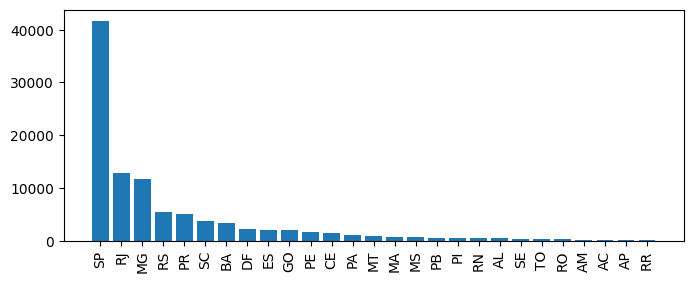

In [7]:
cns= psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select customer_state,count(*) as total_customers from customers 
group by 1
 '''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['State','Customers_count'])
df=df.sort_values(by='Customers_count',ascending=False)
display(df)
plt.figure(figsize=(8,3))
plt.bar(df['State'],df['Customers_count'])
plt.xticks(rotation=90)
plt.show()

# 6. Calculate the number of orders per month in 2018.

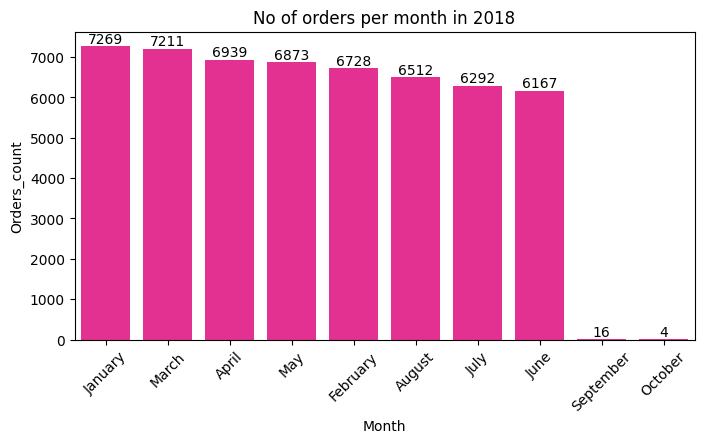

In [8]:
import mysql.connector
db=mysql.connector.connect(host='localhost',username='root',password='1234',database='ecommerce')
cur=db.cursor()
querry='''Select monthname(order_purchase_timestamp) as month,count(*) as total_orders from orders 
where year(order_purchase_timestamp)= 2018 
group by month '''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Month','Orders_count'])
df=df.sort_values(by='Orders_count',ascending=False)
df
plt.figure(figsize=(8,4))
ax=sns.barplot(x=df['Month'],y=df['Orders_count'],data=df,color='deeppink')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("No of orders per month in 2018")
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [9]:
cns= psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry=''' with new_table as
(select o.order_id,o.customer_id,count(oi.order_id) as Total_orders
from orders as o 
join order_items as oi
on oi.order_id=o.order_id
group by o.order_id,o.customer_id)
select c.customer_city,round(avg(nt.total_orders),2) as avg_no_of_orders 
from customers c,new_table nt
where c.customer_id=nt.customer_id
group by c.customer_city'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Customer_city','Average product / order'])
df.head(10)

,Customer_city,Average product / order
0,bom jardim de minas,1.38
1,alto rio doce,1.00
2,alvorada do gurgueia,1.00
3,batatais,1.11
4,capao da porteira,1.00
5,icatu,1.00
6,osorio,1.17
7,populina,2.00
8,novo mundo,1.00
9,tururu,1.00


# 8. Calculate the percentage of total revenue contributed by each product category.

In [10]:
querry='''select p.product_category,sum(pm.payment_value)/(select sum(payment_value) from payments)*100 as percentage_revenue from products p,order_items oi,payments pm
where p.product_id=oi.product_id and oi.order_id=pm.order_id
group by p.product_category
'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','% distribution'])
df.head(10)

,Category,% distribution
0,Agro Industria e Comercio,0.741655
1,Art,0.193598
2,Arts and Crafts,0.014531
3,audio,0.376820
4,automotive,5.323887
5,babies,3.372165
6,Bags Accessories,1.169047
7,bed table bath,10.697529
8,Blu Ray DVDs,0.049568
9,Casa Construcao,0.853560


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
cns= psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select 
p.product_category,
count(oi.product_id),
ROUND(AVG(oi.price)::Decimal, 2) AS average_price
from products p,order_items oi
where oi.product_id=p.product_id
group by p.product_category
'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','order_count','price'])
df['order_count']=df['order_count'].astype(int)
df['price']=df['price'].astype(float)
cr=np.corrcoef(df['order_count'],df['price'])
print("The correlation between price and number of times a product has been puchased is:",cr[0][1])

The correlation between price and number of times a product has been puchased is: -0.106316258238607


# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

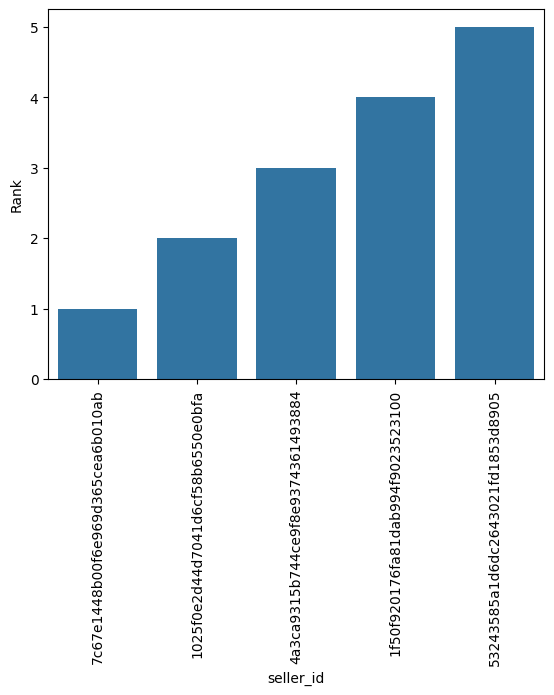

In [12]:
cns=psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select *,
dense_rank() over(order by revenue desc)
from 
(select order_items.seller_id,
 sum(payments.payment_value) as revenue
from order_items 
join payments
on payments.order_id=order_items.order_id
group by order_items.seller_id)
as new_table'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['seller_id','Revenue','Rank'])
df=df.head()
sns.barplot(x=df['seller_id'],y=df['Rank'],data=df)
plt.xticks(rotation=90)
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.

In [13]:
cns=psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select customer_id,order_purchase_timestamp,payment,
round(avg(payment) over(partition by customer_id order by to_timestamp(order_purchase_timestamp,'yyyy-mm-dd') rows between 2 preceding and current row)::decimal,2)
as moving_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from orders ,payments 
where payments.order_id=orders.order_id) as new_table'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['customer_id','order_date','amount','moving average'])
df.head()

,customer_id,order_date,amount,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01


# 12. Calculate the cumulative sales per month for each year.

In [14]:
cns=psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select years,months,payment,
sum(payment) over(order by years,months) as cumulative_sales
from
(select 
extract(year from to_timestamp(orders.order_purchase_timestamp,'yyyy-mm-dd')) as years,
To_char( to_timestamp(orders.order_purchase_timestamp,'yyyy-mm-dd'),'month') as months,
round(sum(payments.payment_value)::decimal,2) as payment
from orders
join payments
on orders.order_id=payments.order_id
group by 1,2
order by 1,2) as new_table
'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','months','payments','cumulative_sales'])
display(df)

,years,months,payments,cumulative_sales
0,2016,december,19.62,19.62
1,2016,october,59090.48,59110.10
2,2016,september,252.24,59362.34
3,2017,april,417788.03,477150.37
4,2017,august,674396.32,1151546.69
5,2017,december,878401.48,2029948.17
6,2017,february,291908.01,2321856.18
7,2017,january,138488.04,2460344.22
8,2017,july,592382.92,3052727.14
9,2017,june,511276.38,3564003.52


# 13. Calculate the year-over-year growth rate of total sales.

In [15]:
querry='''with new_table as
(
select 
extract(year from to_timestamp(orders.order_purchase_timestamp,'yyyy-mm-dd')) as years,
round(sum(payments.payment_value)::decimal,2) as payment
from orders
join payments
on orders.order_id=payments.order_id
group by 1
order by 1) 
select years,
round((payment-lag(payment,1) over(order by years ))/lag(payment,1) over(order by years )*100::decimal,2) yearly_growth
from new_table
'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['year','year over year growth rate'])
display(df)

,year,year over year growth rate
0,2016,None
1,2017,12112.70
2,2018,20.00


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [ ]:
cns=mysql.connector.connect(host='localhost',username='root',password='1234',database='ecommerce')
cur=cns.cursor()
querry='''with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ; '''
cur.execute(querry)
data=cur.fetchall()
data

In [ ]:
none

# 15. Identify the top 3 customers who spent the most money in each year.

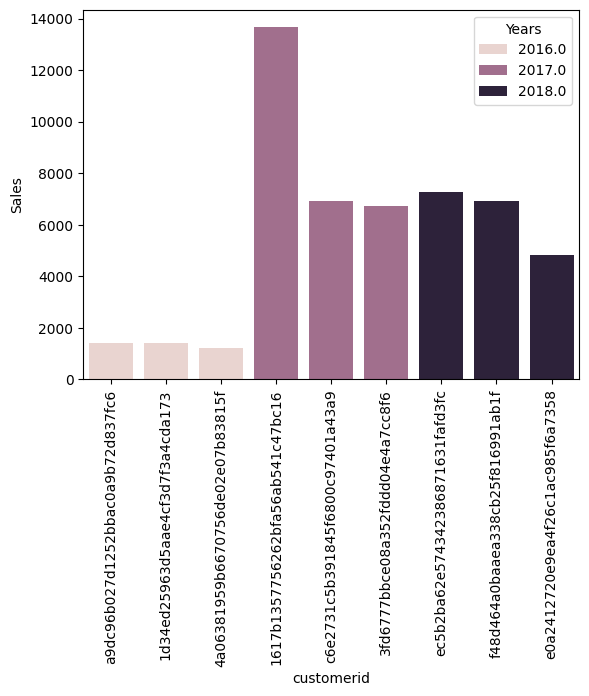

In [8]:
cns=psycopg2.connect(host='localhost',user='postgres',password='admin123',database='ecommerce')
cur=cns.cursor()
querry='''select years,customer_id,payment,d_rank
from
(select 
extract(year from to_timestamp(orders.order_purchase_timestamp,'yyyy-mm-dd')) as years,
orders.customer_id,
sum(payments.payment_value) as payment,
dense_rank() over(partition by extract(year from to_timestamp(orders.order_purchase_timestamp,'yyyy-mm-dd'))
order by sum(payments.payment_value) desc) d_rank
from orders 
join payments 
on orders.order_id=payments.order_id
group by 1,2) as NT
where d_rank<=3'''
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Years','customerid','Sales','Rank'])
sns.barplot(x = "customerid", y = "Sales", data = df, hue = "Years")
plt.xticks(rotation = 90)
plt.show()